In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the dataset 

In [4]:
cars = pd.read_csv(r'D:\Car_Sales.csv')
cars.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


# Understanding the dataset 

In [25]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.3+ KB


# as below we can see that there are more null values in engV and Drive. So  we have to handles null values 

In [26]:
cars.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

<Axes: ylabel='engV'>

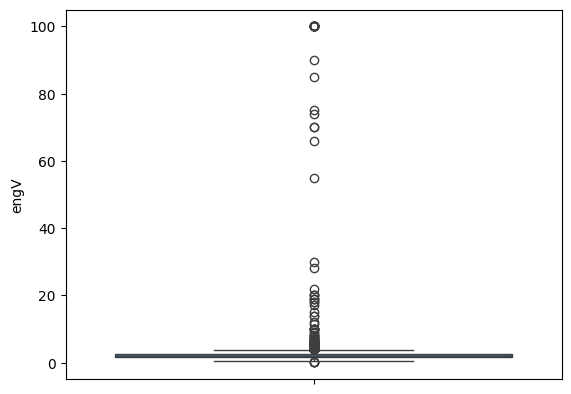

In [27]:
sns.boxplot(data = cars.engV) #as with the help of boxplot we can see that there are more outliers so now we have to deal with this.

In [28]:
#first we check that is there duplicates in dataset
cars.loc[cars.duplicated(), :]# as there are 113 duplicated data. /for rechecking execute same code

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9156,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9163,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9164,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9169,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


In [29]:
cars.drop_duplicates(inplace=True) #113 duplicate rows has been removed from dataset

In [30]:
cars.loc[cars.duplicated(), :] #check the duplicate removes

,car,price,body,mileage,engV,engType,registration,year,model,drive


In [31]:
cars.shape

(9463, 10)

# for drive column we have use the statistic where for categorical data we use the (mode) to fill null values 

In [32]:
Mode_drive =cars['drive'].mode()
Mode_drive

0    front
Name: drive, dtype: object

In [33]:
cars["drive"] =cars["drive"].fillna("front")
cars.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

# for engV column we have use the statistic where for categorical data we use the (mode) to fill null values 

In [34]:
cars['engV'] = cars.groupby(['car','price'])['engV'].transform(lambda x: x.fillna(x.median()))

C:\Users\asmit\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\asmit\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\asmit\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\asmit\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\asmit\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [35]:
cars.isnull().sum() #checking that there should not be any null values

car               0
price             0
body              0
mileage           0
engV            165
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

In [36]:
def f(x):
    if x.count()<=0:
        return np.nan
    return x.value_counts().index[0]
cars['drive'] = cars['drive'].fillna(cars.groupby(['car','body'])['drive'].transform(f))
cars[cars.drive.isnull()]

,car,price,body,mileage,engV,engType,registration,year,model,drive


In [37]:
cars.dropna(subset =['engV'],inplace=True)
cars.dropna(subset =['drive'],inplace=True)
cars.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [38]:
 # Drop rows where 'price' is less than or equal to 0
cars = cars.drop(cars[cars['price'] <= 0].index)

In [39]:
cars.price [cars.price==0].count()

np.int64(0)

In [40]:
mileages = cars["mileage"].median()
cars["mileage"] = cars["mileage"].replace(0,mileages)
cars.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [41]:
cars.mileage [cars.mileage==0].count()

np.int64(0)

In [42]:
cars.columns  #checking cloumns of dataset

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [43]:
cars.describe() 

,price,mileage,engV,year
count,9059.000000,9059.000000,9059.000000,9059.000000
mean,15534.442042,145.705265,2.632610,2006.462855
std,22865.914133,94.773660,6.011131,6.918143
min,259.350000,1.000000,0.100000,1959.000000
25%,5400.000000,81.000000,1.600000,2004.000000
50%,9400.000000,130.000000,2.000000,2008.000000
75%,16725.000000,196.000000,2.500000,2011.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [44]:
cars.describe(include = "all")

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9059,9059.000000,9059,9059.000000,9059.000000,9059,9059,9059.000000,9059,9059
unique,84,NaN,6,NaN,NaN,4,2,NaN,844,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,894,NaN,3510,NaN,NaN,4222,8523,NaN,185,5477
mean,NaN,15534.442042,NaN,145.705265,2.632610,NaN,NaN,2006.462855,NaN,NaN
std,NaN,22865.914133,NaN,94.773660,6.011131,NaN,NaN,6.918143,NaN,NaN
min,NaN,259.350000,NaN,1.000000,0.100000,NaN,NaN,1959.000000,NaN,NaN
25%,NaN,5400.000000,NaN,81.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9400.000000,NaN,130.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16725.000000,NaN,196.000000,2.500000,NaN,NaN,2011.000000,NaN,NaN


# Q1.Which types of cars are sold maximum? 

In [46]:
car_counts = cars.groupby('car')['price'].count().sort_values(ascending=False)
car_counts.head()

car
Volkswagen       894
Mercedes-Benz    822
BMW              654
Toyota           511
VAZ              472
Name: price, dtype: int64

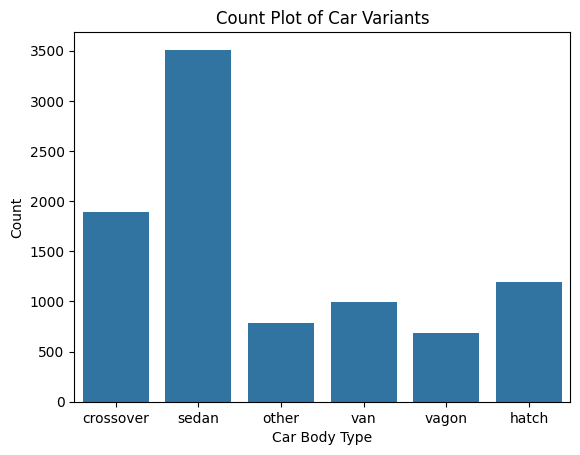

In [47]:
sns.countplot(x='body', data=cars)
# Add title and labels
plt.title('Count Plot of Car Variants')
plt.xlabel('Car Body Type')
plt.ylabel('Count')

plt.show()

Analysis : It has seen observe that the most selling car was Volkswagen	,Mercedes-Benz and BMW.

# Q2.find the corelation between price and mileage 

<Axes: xlabel='mileage', ylabel='price'>

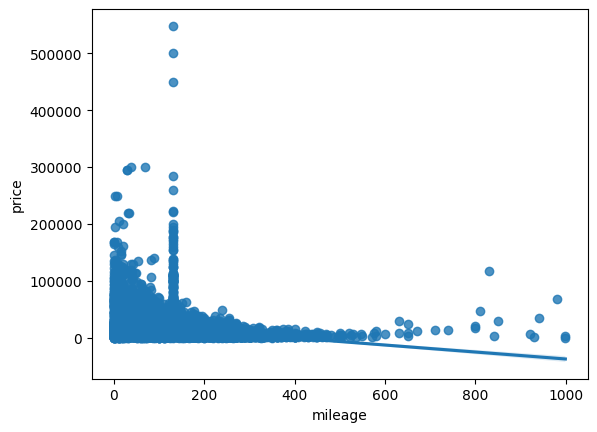

In [87]:
# Calculate the correlation between 'price' and 'mileage'
correlation = cars['price'].corr(cars['mileage'])
sns.regplot(x='mileage' ,y = 'price',data = cars)


Analysis : The correlation between the price and mileage is (Negatively Co-related) [-0.2501124830522926] 

# Q3.How many cars are registered? 

In [101]:
cars['registration'].value_counts()

registration
yes    8523
no      536
Name: count, dtype: int64

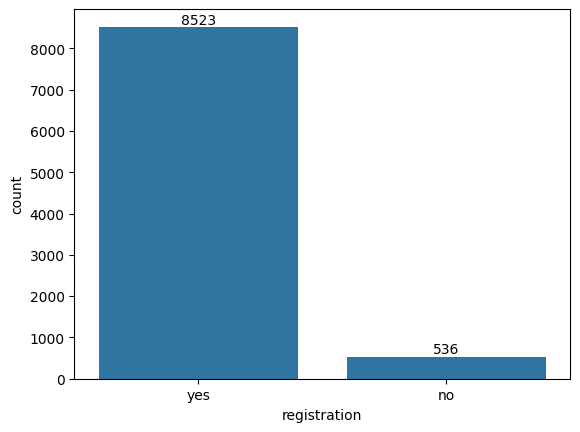

In [93]:
ax = sns.countplot(x= 'registration', data = cars)
for bars in ax.containers:
    ax.bar_label(bars)

 # Q4 Price distribution between registered and non-registered cars 

In [6]:
cars.groupby(['registration','body'])['price'].mean()

registration  body     
no            crossover     7816.542373
              hatch         2563.750000
              other         3817.393939
              sedan         3906.605691
              vagon         3055.507353
              van           3488.457143
yes           crossover    30276.184026
              hatch         8735.654593
              other        19922.109491
              sedan        12748.484312
              vagon         9986.616788
              van          10762.617332
Name: price, dtype: float64

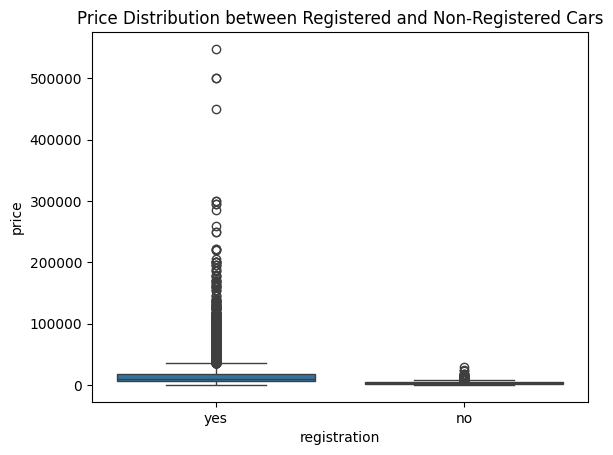

In [5]:
ax = sns.boxplot(x='registration', y='price',  data=cars)

plt.title('Price Distribution between Registered and Non-Registered Cars')
plt.show()


# Q5.What is the car price distribution based on Engine Value? 

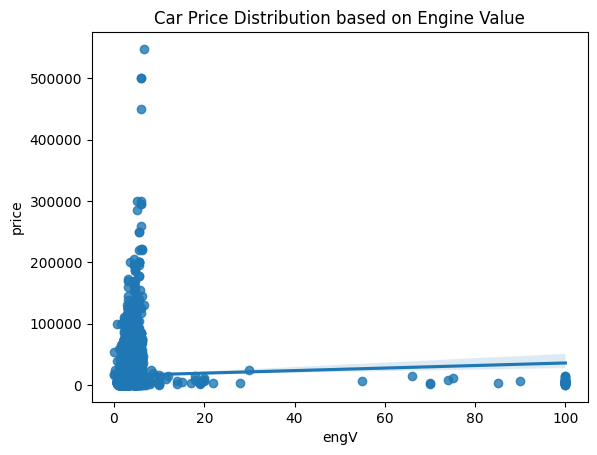

In [15]:
sns.regplot(x='engV' ,y = 'price',data = cars)
plt.title('Car Price Distribution based on Engine Value')
plt.show()

# Q6.Which Engine Type of cars users preferred maximum?


In [33]:
cars.groupby('car')['engType'].value_counts().idxmax()


('Volkswagen', 'Diesel')

# Q7.Distribution of Price

<Axes: xlabel='price', ylabel='Count'>

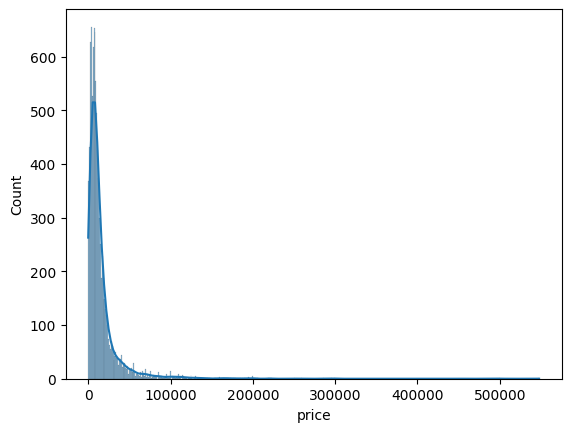

In [34]:
sns.histplot(cars['price'], kde=True)